# Verification of the narrow-line Seyfert 1 galaxies
Here, we verify if the Seyfert galaxies classified as type 1 with narrow lines (S1n), show any difference with respect to a typical Seyfert 1 galaxy (Sy1). These S1n galaxies were used in the project as Sy1 galaxies.
First, we import the packages for the analysis

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
import astropy.units as u
from scipy.stats import ks_2samp
import matplotlib.lines as mlines
from astropy.table import Table, join

In [3]:
def CriticalV(size1, size2, alpha=0.05):
    """Critical value for the KS two sample test"""
    Section1 = -np.log(alpha/2)
    Section2 = 1+(size2/size1)
    Section3 = 2*size2
    return (np.sqrt(Section1*(Section2/Section3)))

## Join Information

We read the list of S1n galaxies and compare them with the clean sample coming from SKIRTOR. We then split the galaxies in original S1n and Sy1. 

In [4]:
S1n = Table.read('NLS1_reclass.txt', format='ascii')
S1n.rename_column('main_id', 'id')  # Renamed to use the join with the same id

ModelS = Table.read('CIGALEOutputs/Cleanresults_SK.fits', format='fits')

TV = Table.read('VCV_TAP_otype.txt', format='ascii')
TV.rename_column('main_id', 'id')  # Renamed to use the join with the same id

In [5]:
SPandas = join(TV, ModelS, keys='id').to_pandas()

In [6]:
NoS1n = [SPandas['id'][sd] not in S1n['id'] for sd in range(len(SPandas))]
YesS1n = [SPandas['id'][sd] in S1n['id'] for sd in range(len(SPandas))]
OnlyS1 = logical_and(NoS1n, SPandas['Sp'] == 'S1')

In [7]:
SPandas['Sey1s'] = np.empty(len(SPandas),dtype='str')
SPandas.loc[OnlyS1, 'Sey1s'] = 'Sy1'
SPandas.loc[YesS1n, 'Sey1s'] = 'S1n'

In [8]:
print('Total number of Seyfert 1:',sum(SPandas['Sp']=='S1'))
print('Total number of S1n reclassified:',sum(SPandas['Sey1s']=='S1n'))
print('Total number of S1 without S1n:',sum(SPandas['Sey1s']=='Sy1'))

Total number of Seyfert 1: 5985
Total number of S1n reclassified: 1409
Total number of S1 without S1n: 4576


The critical value for the KS test is going to be:

In [9]:
CriticalV(sum(SPandas['Sey1s']=='S1n'),sum(SPandas['Sey1s']=='Sy1'))

0.04137764858141174

## Comparing AGN parameters
We compare the AGN physical parameters between the subset of S1n and S1 galaxies. We added SFR the the comparison.

In [10]:
AGNParam = ['bayes.agn.EBV', 
            'bayes.agn.fracAGN',
            'bayes.agn.i',
            'bayes.sfh.sfr',
            'bayes.agn.accretion_power',
            'bayes.agn.disk_luminosity',
            'bayes.agn.dust_luminosity',
            'bayes.agn.luminosity']
ParamLabel = ['Polar-dust E(B-V) [mag]', 'AGN Fraction',
              'Viewing angle [degrees]', 'SFR [log(M$_{\odot}$/yr)]',
              'AGN accretion power [log(L$_{\odot}$)]', 
              'AGN disk luminosity [log(L$_{\odot}$)]', 
              'AGN dust luminosity [log(L$_{\odot}$)]', 
              'AGN total luminosity [log(L$_{\odot}$)]']
ParamRange = [[0, 1], [0.05, 0.95], [0, 90], [-3,3]]

We change the units of the luminosities to log solar luminosities

In [11]:
for kisd in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.dust_luminosity',
             'bayes.agn.accretion_power']:
    SPandas[kisd] = np.log10((SPandas[kisd].values*u.W).to(u.solLum).value)
    SPandas[kisd+'_err'] = (SPandas[kisd+'_err'].values *
                             u.W).to(u.solLum).value
SPandas['bayes.sfh.sfr'] = np.log10((SPandas['bayes.sfh.sfr']))

##### FIGURE A1 
Finally, we compare the probability distributions for both types. We also calculate the median and 

No handles with labels found to put in legend.


KstestResult(statistic=0.14307374669333506, pvalue=4.440892098500626e-16)
For bayes.agn.EBV the median of S1n is 0.11
For bayes.agn.EBV the median of Sy1 is 0.18


No handles with labels found to put in legend.


KstestResult(statistic=0.11010310218525264, pvalue=7.882583474838611e-12)
For bayes.agn.fracAGN the median of S1n is 0.49
For bayes.agn.fracAGN the median of Sy1 is 0.44


No handles with labels found to put in legend.


KstestResult(statistic=0.0836255875068863, pvalue=5.262328243160752e-07)
For bayes.agn.i the median of S1n is 26.09
For bayes.agn.i the median of Sy1 is 25.89


No handles with labels found to put in legend.


KstestResult(statistic=0.17779000630313618, pvalue=4.440892098500626e-16)
For bayes.sfh.sfr the median of S1n is 1.18
For bayes.sfh.sfr the median of Sy1 is 0.94


No handles with labels found to put in legend.


KstestResult(statistic=0.24459704596326315, pvalue=4.440892098500626e-16)
For bayes.agn.accretion_power the median of S1n is 11.29
For bayes.agn.accretion_power the median of Sy1 is 11.00


No handles with labels found to put in legend.


KstestResult(statistic=0.24678267084228758, pvalue=4.440892098500626e-16)
For bayes.agn.disk_luminosity the median of S1n is 11.25
For bayes.agn.disk_luminosity the median of Sy1 is 10.89


No handles with labels found to put in legend.


KstestResult(statistic=0.239167725461196, pvalue=4.440892098500626e-16)
For bayes.agn.dust_luminosity the median of S1n is 11.15
For bayes.agn.dust_luminosity the median of Sy1 is 10.86


No handles with labels found to put in legend.


KstestResult(statistic=0.2791993093847246, pvalue=4.440892098500626e-16)
For bayes.agn.luminosity the median of S1n is 11.58
For bayes.agn.luminosity the median of Sy1 is 11.27


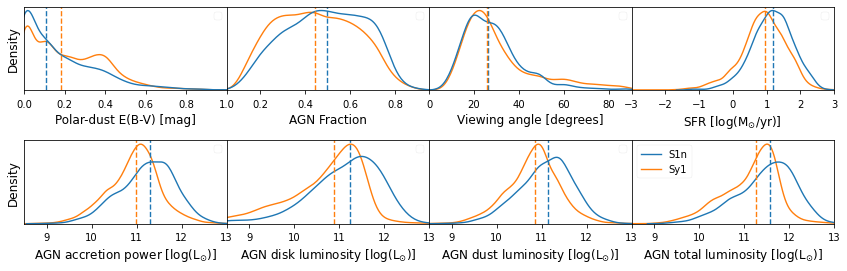

In [12]:
%matplotlib inline
# with plt.style.context('seaborn-talk'):
with plt.style.context('seaborn-paper'):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = subplots(2, 4, figsize=(14.06, 3.77))
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    for iPar, Parm in enumerate(AGNParam):
        sns.kdeplot(data=SPandas, x=Parm, hue='Sey1s', ax=axs[iPar],
                    common_norm=False, hue_order=['S1n', 'Sy1'])
        axs[iPar].set_yticks([])
        SetS1n = SPandas[Parm][SPandas['Sey1s'] == 'S1n']
        SetSy1 = SPandas[Parm][SPandas['Sey1s'] == 'Sy1']
        print(ks_2samp(SetS1n, SetSy1))
        MedS1n = np.median(SPandas[Parm][SPandas['Sey1s'] == 'S1n'])
        MedS1 = np.median(SPandas[Parm][SPandas['Sey1s'] == 'Sy1'])
        axs[iPar].axvline(MedS1n, ls='--', c='C0')
        axs[iPar].axvline(MedS1, ls='--', c='C1')
        print('For %s the median of S1n is %1.2f' % (Parm, MedS1n))
        print('For %s the median of Sy1 is %1.2f' % (Parm, MedS1))
        if iPar >= 4:
            axs[iPar].set_xlim(8.5, 13)
        else:
            axs[iPar].set_xlim(ParamRange[iPar][0],ParamRange[iPar][1])
        if ~np.logical_xor(iPar != 0, iPar != 4):
                axs[iPar].set_ylabel(None)
        axs[iPar].set_xlabel(ParamLabel[iPar])
        axs[iPar].legend()
    subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6, wspace=0)
    S1_n = mlines.Line2D([], [], color='C0', label='S1n', ls='-')
    S1_b = mlines.Line2D([], [], color='C1', label='Sy1', ls='-')
    plt.legend(handles=[S1_n, S1_b], loc='upper left')
    savefig('Figures/A1.pdf', dpi=300, bbox_inches='tight')  # For Paper
#     savefig('Talk_Figures/A1.png',dpi=300,bbox_inches = 'tight') ## For Presentation

##### Notebook info

In [13]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
sys       : 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
autopep8  : 1.5.4
astropy   : 4.2
matplotlib: 3.2.2
numpy     : 1.19.5
logging   : 0.5.1.2
re        : 2.2.1
json      : 2.0.9
seaborn   : 0.11.1

Watermark: 2.1.0

